# Fit the RLDDM on individual data

## Import the data

In [5]:
from rlssm.utility.load_data import load_example_dataset

# import some example data:
data = load_example_dataset(hierarchical_levels=1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,13,1,1,34,33,2,1,1,2.007335,1,0
1,13,1,2,46,39,2,1,2,1.573155,1,0
2,13,1,3,51,48,4,3,1,2.280624,1,0
3,13,1,4,54,36,4,2,2,1.195500,0,0
4,13,1,5,61,41,4,2,3,1.523336,1,0


## Initialize the model

In [6]:
from rlssm.model.models_DDM import RLDDModel

# you can "turn on and off" different mechanisms:
model = RLDDModel(hierarchical_levels=1,
                  separate_learning_rates=False,
                  threshold_modulation=False,
                  nonlinear_mapping=True)

Using cached StanModel


## Fit

In [7]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4  # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5  # initial learning value (Q0)

In [8]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

### get Rhat

In [9]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.019240,lp__
alpha,1.001380,alpha
drift_scaling,1.073000,drift_scaling
drift_asymptote,1.026370,drift_asymptote
threshold,1.005050,threshold
...,...,...
log_lik[235],1.001280,log_lik[235]
log_lik[236],1.001700,log_lik[236]
log_lik[237],0.999757,log_lik[237]


### get wAIC

In [10]:
model_fit.waic

{'lppd': -229.20195840123006,
 'p_waic': 4.971692736017802,
 'waic': 468.34730227449575,
 'waic_se': 35.75340770222775}

## Posteriors

In [11]:
model_fit.samples.describe()

,transf_drift_asymptote,transf_threshold,transf_drift_scaling,transf_ndt,transf_alpha
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,39.762068,1.922063,0.017025,0.795509,0.507405
std,28.755640,0.067054,0.013873,0.015706,0.127301
min,7.118410,1.706700,0.001853,0.738854,0.129663
25%,15.366950,1.874637,0.006459,0.786445,0.408079
50%,33.110800,1.916575,0.011127,0.795969,0.505730
75%,56.444175,1.972433,0.024621,0.806053,0.592034
max,167.226000,2.189460,0.055257,0.830424,0.993353


In [12]:
import seaborn as sns

sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

(0.0, 20.0)

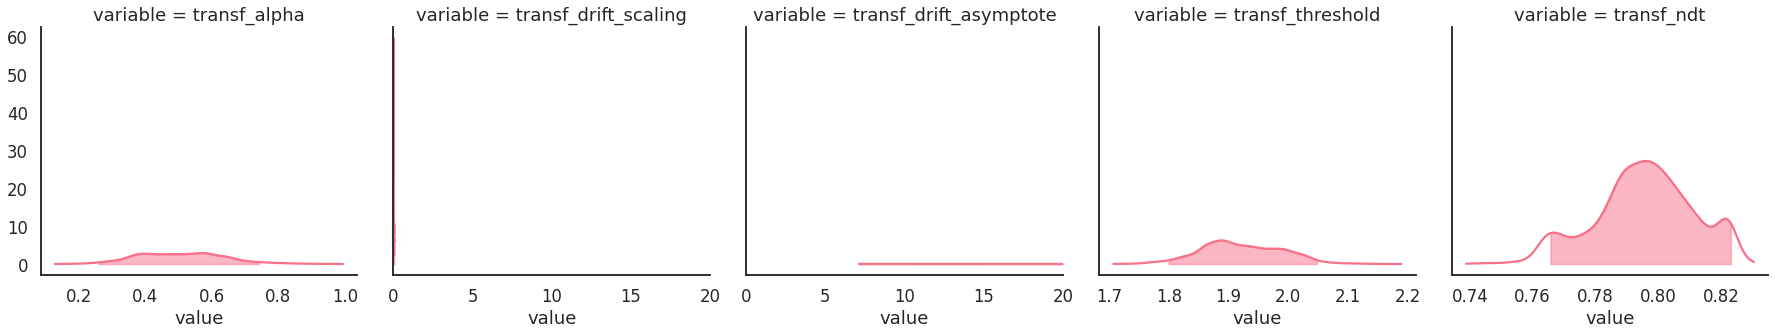

In [13]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

g.axes.flat[1].set_xlim(0, 20)
g.axes.flat[2].set_xlim(0, 20)

## Posterior predictives

### Ungrouped

In [14]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.180147  1.204147  1.878147  1.175147  1.589147  1.559147   
2         1.507921  0.918921  1.152921  1.560921  1.116921  1.206921   
3         1.938010  1.726010  1.786010  2.555010  2.019010  1.021010   
4         0.988321  1.131321  1.117321  2.420321  1.233321  4.436321   
5         1.274819  1.823819  1.142819  1.550819  1.036819  2.181819   
...            ...       ...       ...       ...       ...       ...   
96        1.904535  0.938535  1.021535  1.197535  1.464535  2.337535   
97        1.661215  1.897215  1.696215  2.095215  1.308215  2.489215   
98        1.528200  1.646200  1.903200  1.018200  1.339200  1.188200   
99        4.184392  2.371392  1.074392  2.011392  0.960392  1.931392   
100       1.667131  2.014131  1.527131  1.040131  1.841131  1.917131   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.078147  1.177147  1.383147  2.436147  ...      1.0  1.0  1.0  1.0   
2         1.181921  1.491921  1.316921  1.850921  ...      1.0  1.0  0.0  1.0   
3         1.840010  1.090010  1.280010  1.033010  ...      1.0  1.0  1.0  0.0   
4         1.411321  1.246321  0.955321  1.826321  ...      1.0  1.0  0.0  0.0   
5         1.514819  1.679819  0.981819  2.947819  ...      0.0  1.0  1.0  0.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.229535  2.261535  1.010535  1.399535  ...      0.0  1.0  1.0  1.0   
97        1.789215  1.059215  2.617215  2.200215  ...      1.0  1.0  1.0  1.0   
98        0.945200  1.242200  1.553200  1.097200  ...      1.0  1.0  1.0  1.0   
99        1.580392  1.216392  1.147392  2.170392  ...      1.0  1.0  1.0  1.0   
100       1.517131  1.292131  2.281131  1.325131  ...      1.0  1.0  0.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  0.0  1.0  1.0  1.0  
3         1.0  1.0  0.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  0.0  1.0  
5         1.0  1.0  0.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  0.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  0.0  1.0  1.0  1.0  

[100 rows x 478 columns]

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.732218,1.579967,1.909545,1.031547,1.138847,1.384147,1.568047,2.859647,0.970947,1.131147,1.345147,1.705347,2.481947
2,0.807531,1.481524,1.484929,0.976421,1.148921,1.406921,1.775421,2.131921,1.025321,1.130321,1.274921,1.606721,2.188721
3,0.807531,1.565223,1.966920,0.992510,1.146010,1.355010,1.752010,2.139010,1.038210,1.213210,1.392010,1.734410,2.349210
4,0.774059,1.559166,1.845887,1.016221,1.221421,1.339321,1.750021,2.204621,0.997921,1.232121,1.411321,1.716521,2.327921
5,0.786611,1.624401,1.436980,1.064819,1.290819,1.486819,1.821819,2.451819,1.006819,1.192119,1.409819,1.675619,2.554219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.748954,1.543129,2.470084,1.029335,1.221335,1.592535,1.895335,2.518835,1.000535,1.159335,1.336535,1.549935,2.094935
97,0.803347,1.563571,2.210872,1.099415,1.273015,1.515215,1.670415,2.145015,1.041415,1.233415,1.397215,1.682915,2.300115
98,0.803347,1.511803,2.565248,1.128600,1.244600,1.451200,1.939000,2.291000,1.005900,1.149500,1.318200,1.579700,2.101800


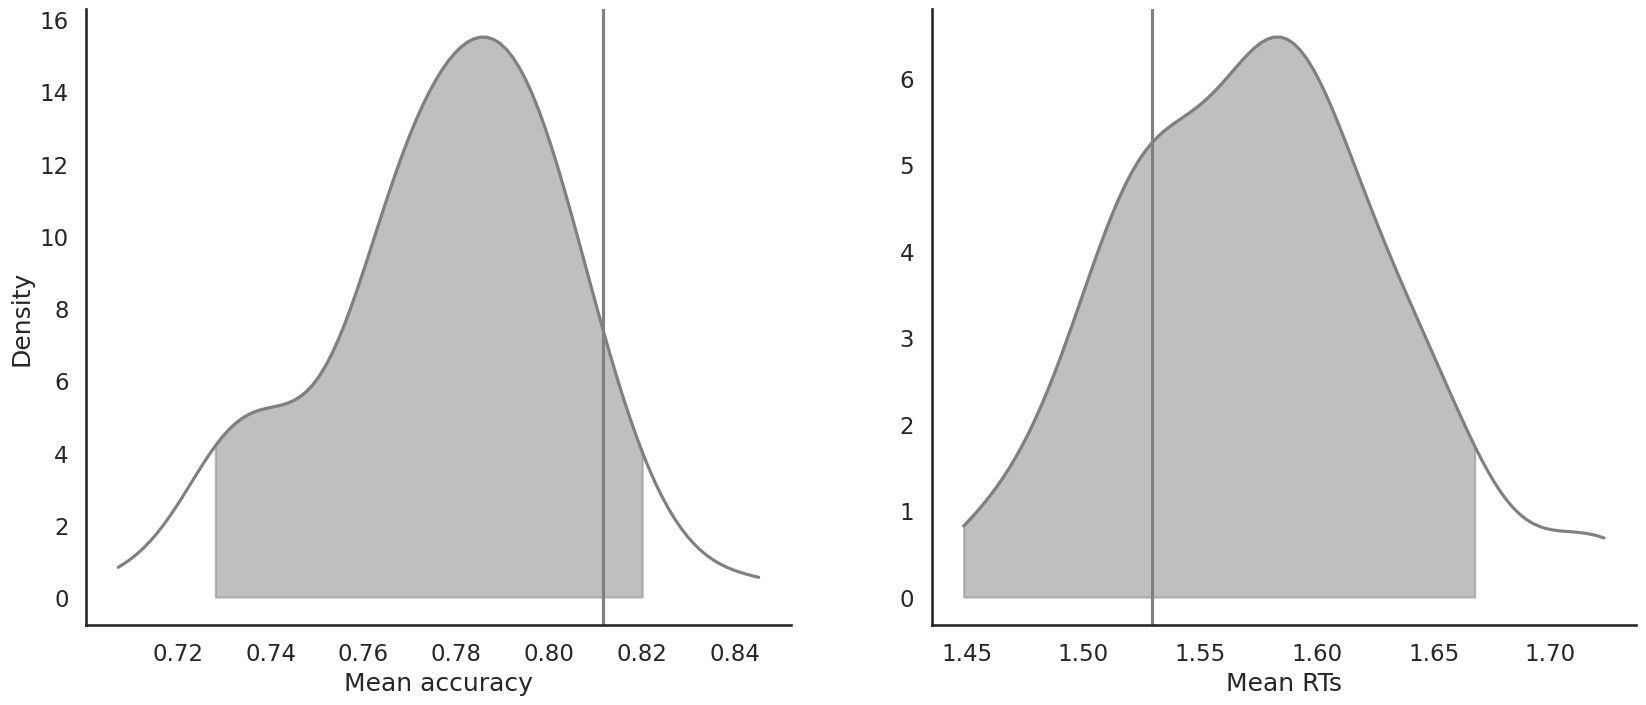

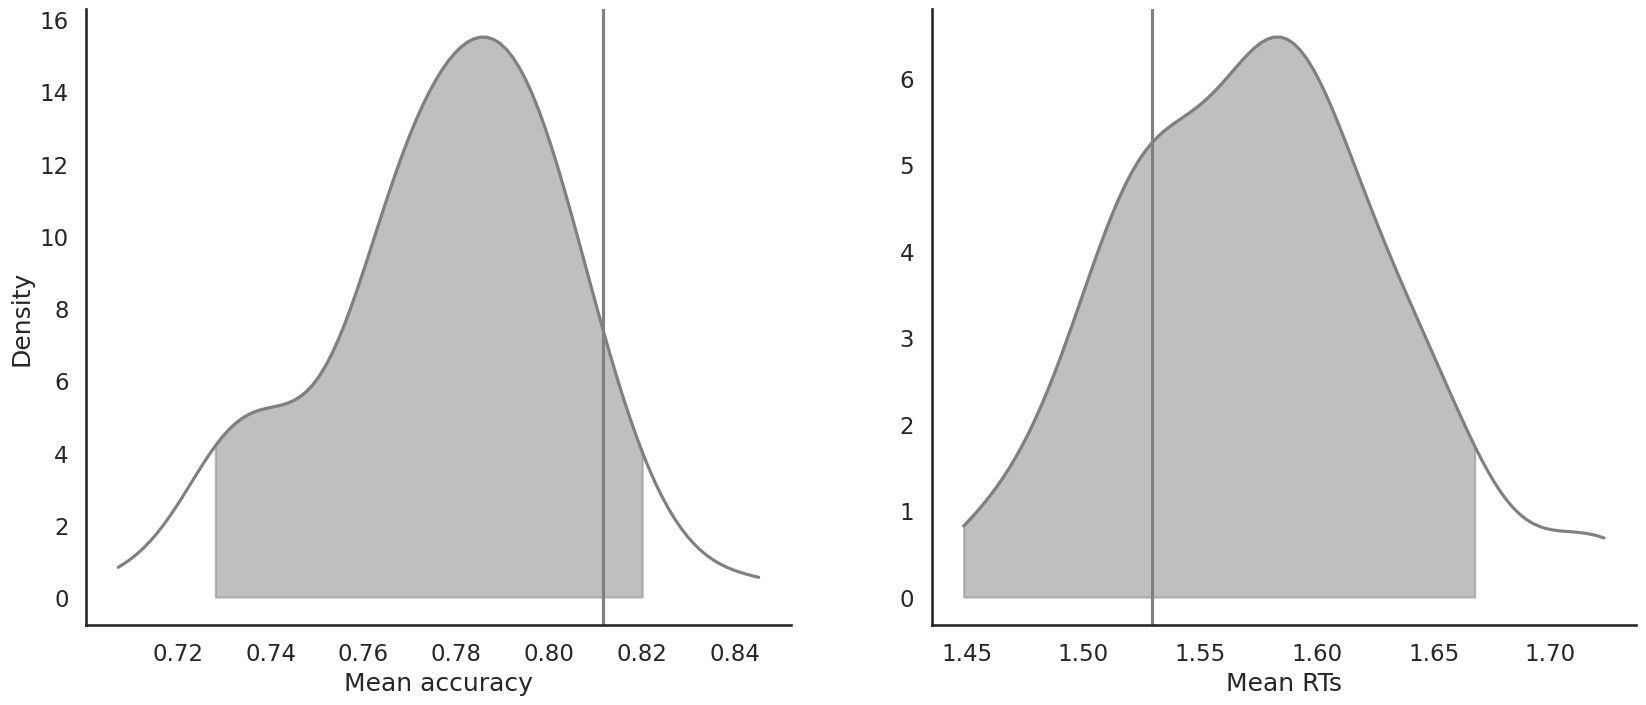

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20, 8), show_intervals='HDI')

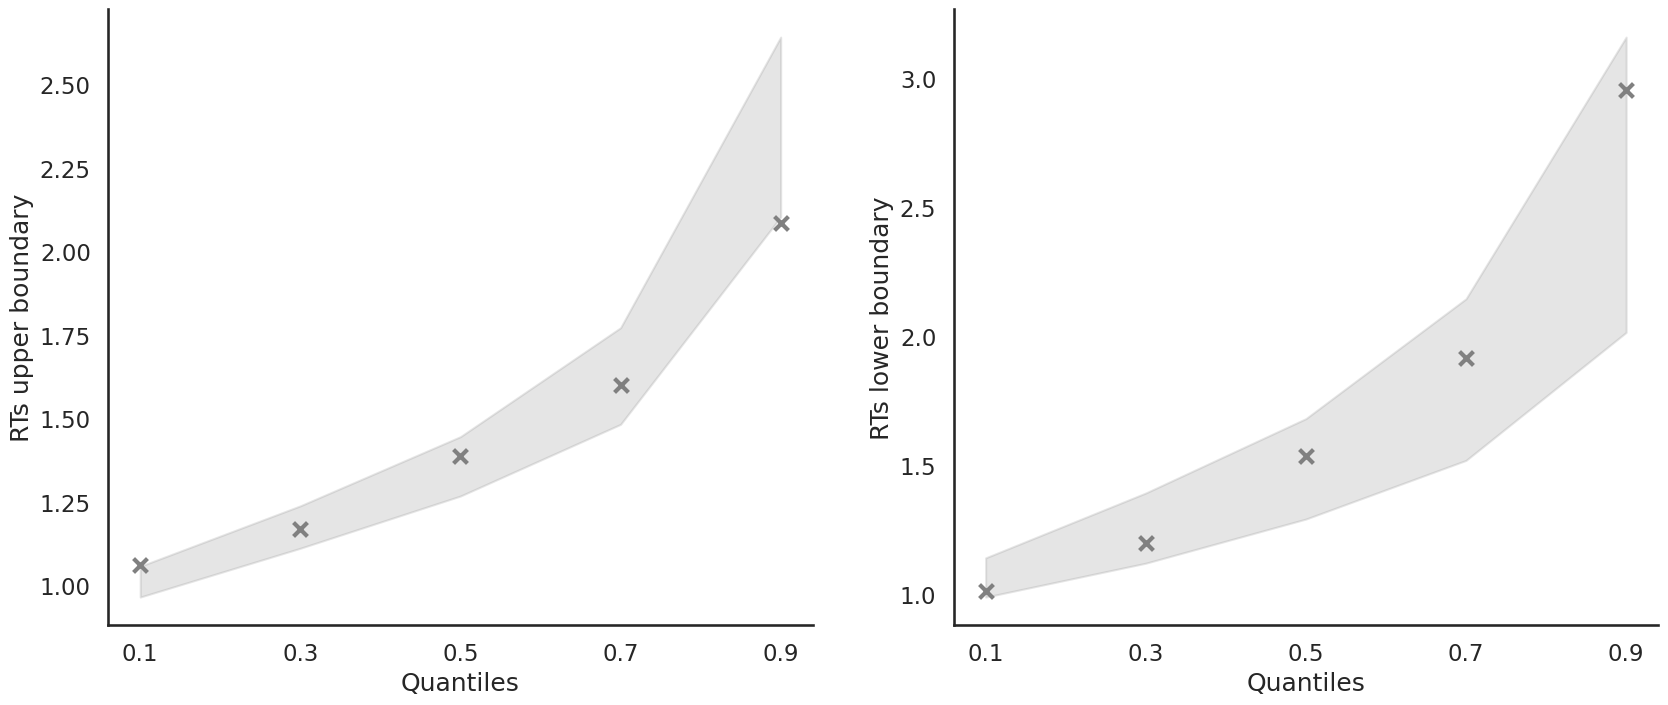

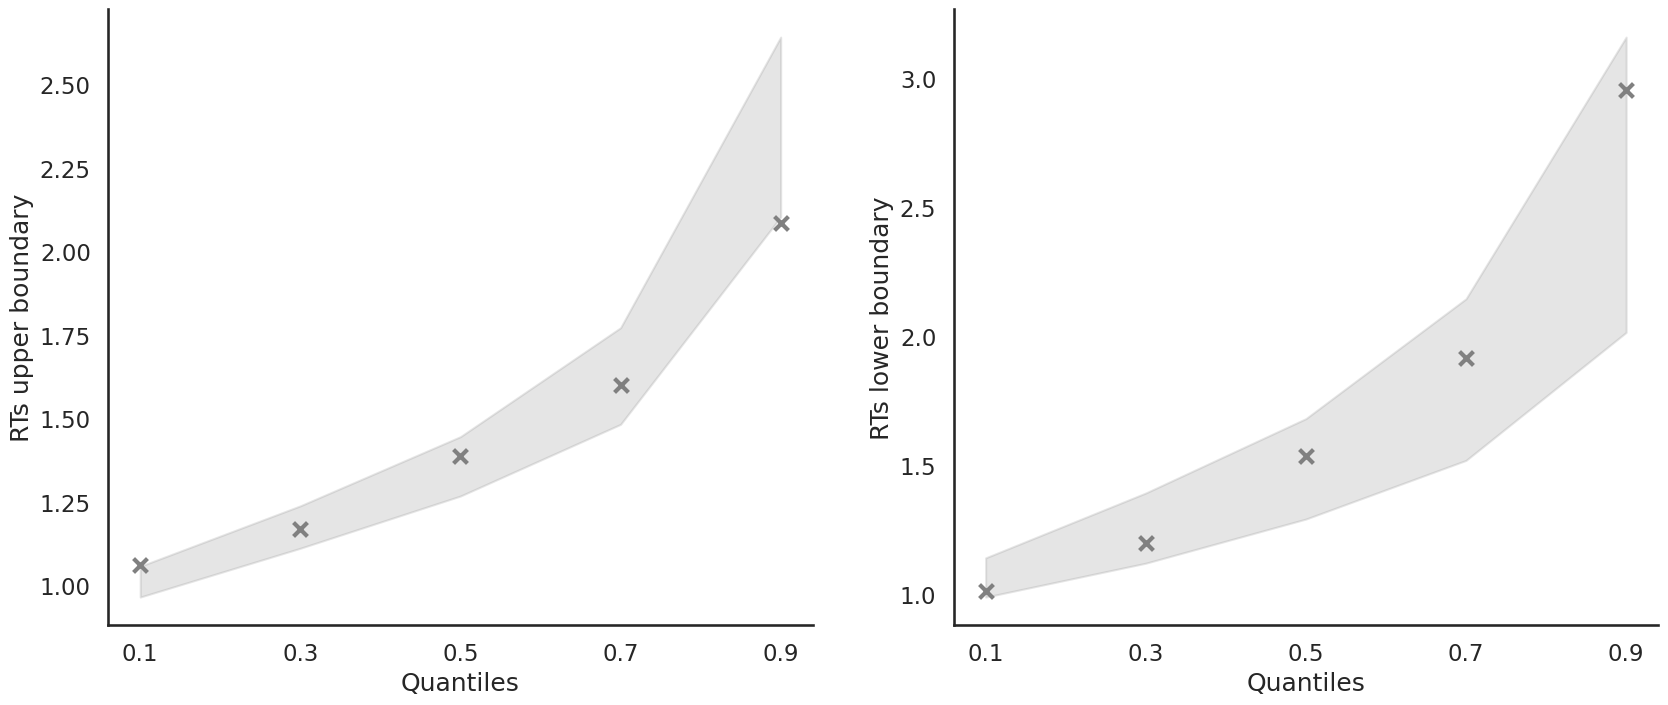

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades')

### Grouped

In [18]:
import numpy as np
import pandas as pd

# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
    grouping_vars=['block_label', 'choice_pair'],
    quantiles=[.3, .5, .7],
    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.50  1.566747  1.098413   
                        2                0.85  1.760671  1.483943   
                        3                0.65  1.463610  0.416334   
                        4                0.50  1.718621  0.859416   
                        5                0.75  1.645819 -0.008604   
...                                       ...       ...       ...   
3           CD          96               0.75  1.615885  1.044242   
                        97               0.80  1.974265  1.534582   
                        98               0.80  1.655000  3.105331   
                        99               0.55  1.608842  1.077797   
                        100              0.70  1.824131  1.847080   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.215347        1.169447   
                        2              1.373321        1.331521   
                        3              1.293810        1.309610   
                        4              1.217321        1.575421   
                        5              1.502819        1.233419   
...                                         ...             ...   
3           CD          96             1.231535        1.279935   
                        97             1.847215        1.243215   
                        98             1.041300        1.118700   
                        99             1.303992        1.224392   
                        100            1.526631        1.206731   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.457647        1.429147   
                        2              1.668921        1.492921   
                        3              1.391010        1.394010   
                        4              1.351821        1.845321   
                        5              2.150819        1.561819   
...                                         ...             ...   
3           CD          96             1.383535        1.505535   
                        97             2.602215        1.579215   
                        98             1.154700        1.414200   
                        99             1.713392        1.315392   
                        100            1.970131        1.370131   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.614847        1.848647  
                        2              2.041721        2.025521  
                        3              1.578010        1.585210  
                        4              1.898121        2.265221  
                        5              2.194019        1.810819  
...                                         ...             ...  
3           CD          96             1.454735        1.856935  
                        97             3.471315        1.932215  
                        98             1.337700        1.927200  
                        99             2.062792        1.542392  
                        100            2.361131        1.673231  

[1200 rows x 9 columns]

In [20]:
model_fit.get_grouped_posterior_predictives_summary(
    grouping_vars=['block_bins'],
    quantiles=[.3, .5, .7],
    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.733333  1.394214  2.832000         0.998247   
           2            0.700000  1.669521  1.068057         1.200521   
           3            0.566667  2.003310  2.160262         1.440010   
           4            0.700000  1.484621  0.756353         1.243121   
           5            0.900000  1.768052  2.872987         1.336819   
...                          ...       ...       ...              ...   
8          96           0.862069  1.457190  0.536524         1.207735   
           97           0.793103  1.615491  1.531496         1.284715   
           98           0.862069  1.319890  1.427118         1.321200   
           99           0.862069  1.384116  1.605039         1.189592   
           100          0.827586  1.406786  1.157022         1.260531   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.128947         1.246147        1.216647   
           2             1.234921         1.294921        1.702921   
           3             1.373010         1.662010        1.988010   
           4             1.186321         1.379321        1.454321   
           5             1.233019         1.472819        1.371819   
...                           ...              ...             ...   
8          96            1.115335         1.411035        1.437535   
           97            1.253215         1.398215        1.527215   
           98            1.081200         1.446200        1.221200   
           99            1.104992         1.369892        1.250392   
           100           1.110131         1.386131        1.242131   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.422047        1.445547  
           2              1.555121        2.120921  
           3              2.322010        2.131010  
           4              1.549921        1.821321  
           5              1.821619        1.711419  
...                            ...             ...  
8          96             1.650035        1.610535  
           97             1.448215        1.722215  
           98             1.585700        1.430600  
           99             1.665292        1.477392  
           100            1.653331        1.463431  

[800 rows x 9 columns]

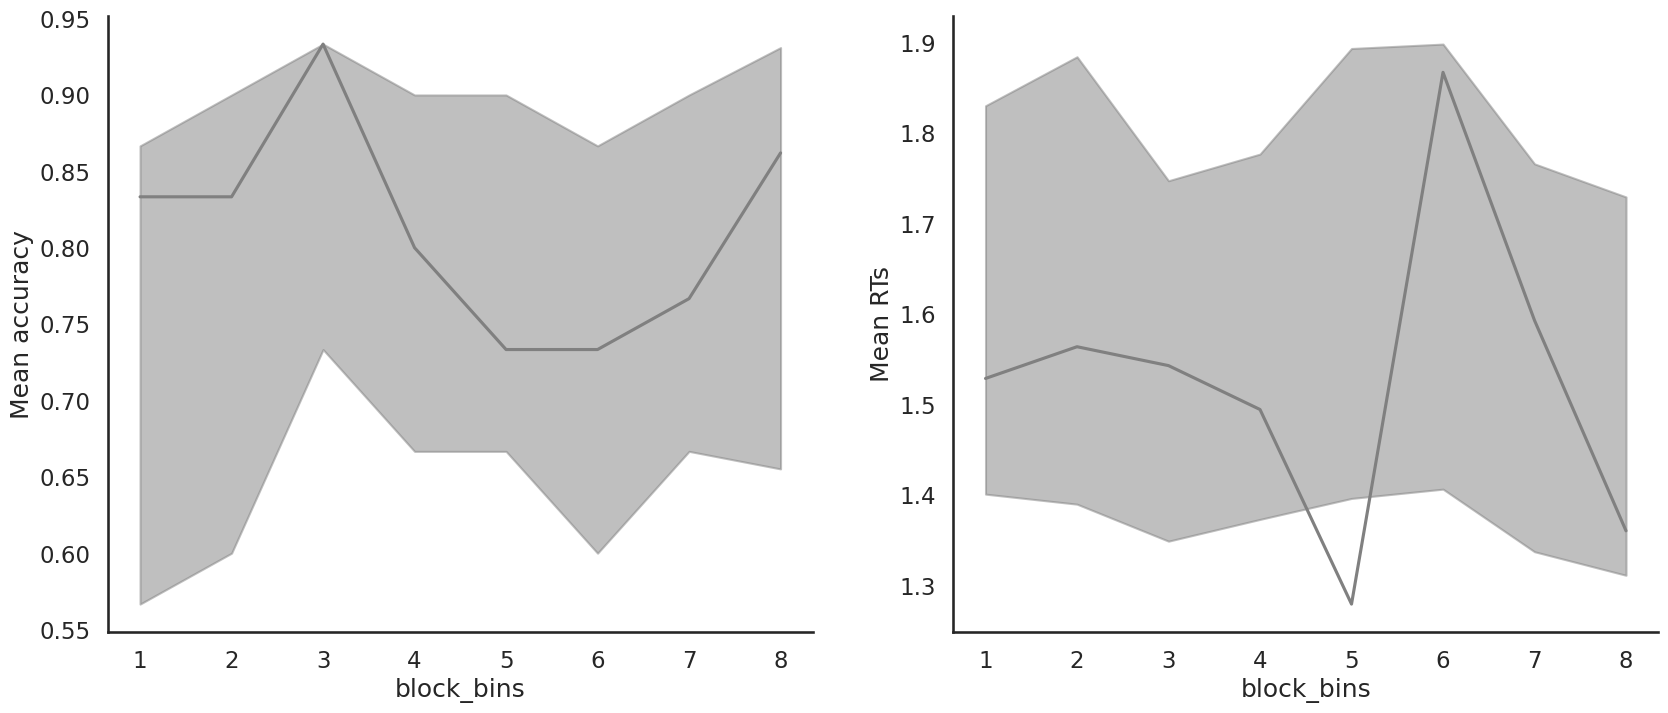

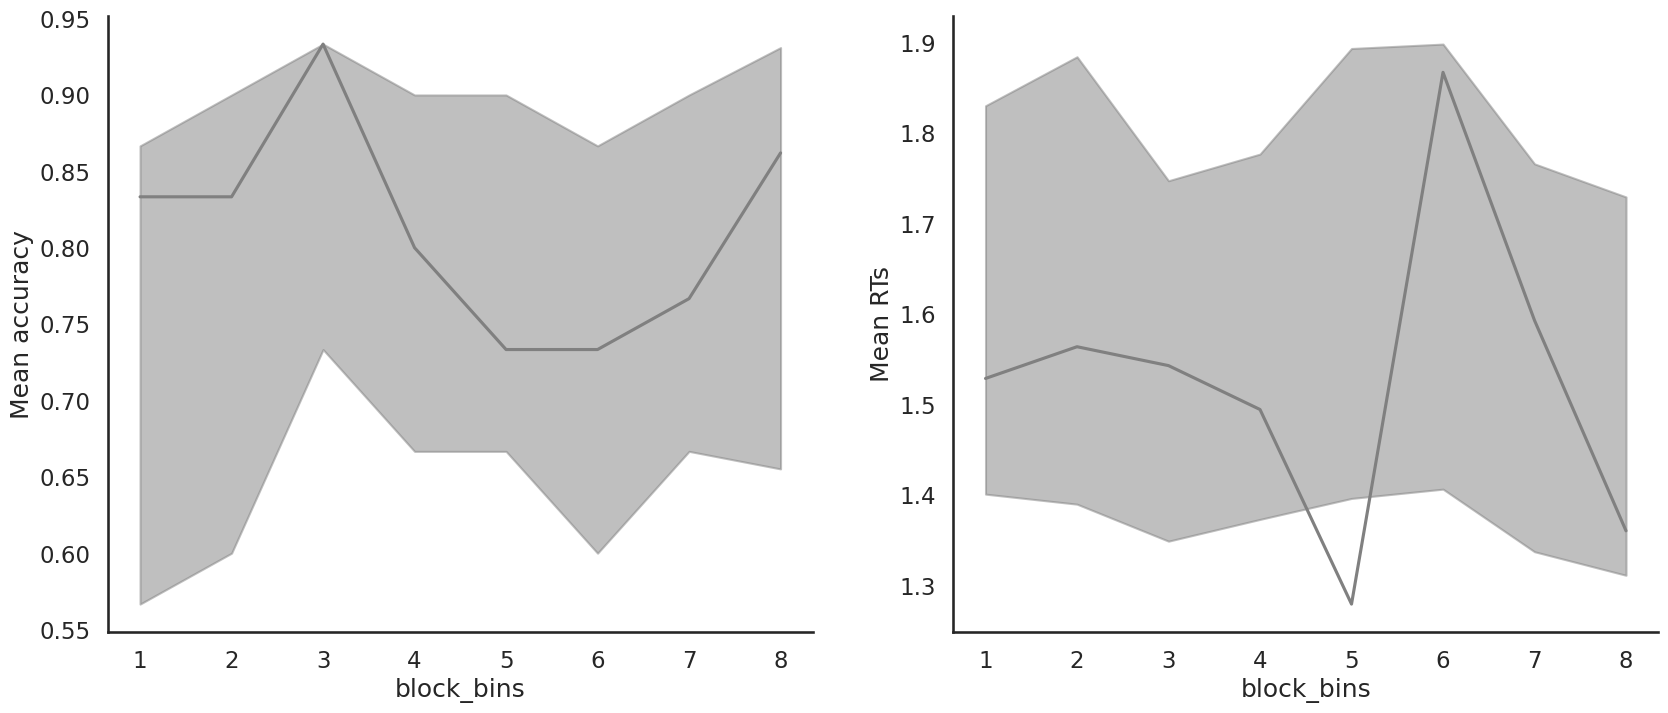

In [21]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'],
                                                  n_posterior_predictives=100,
                                                  figsize=(20, 8))

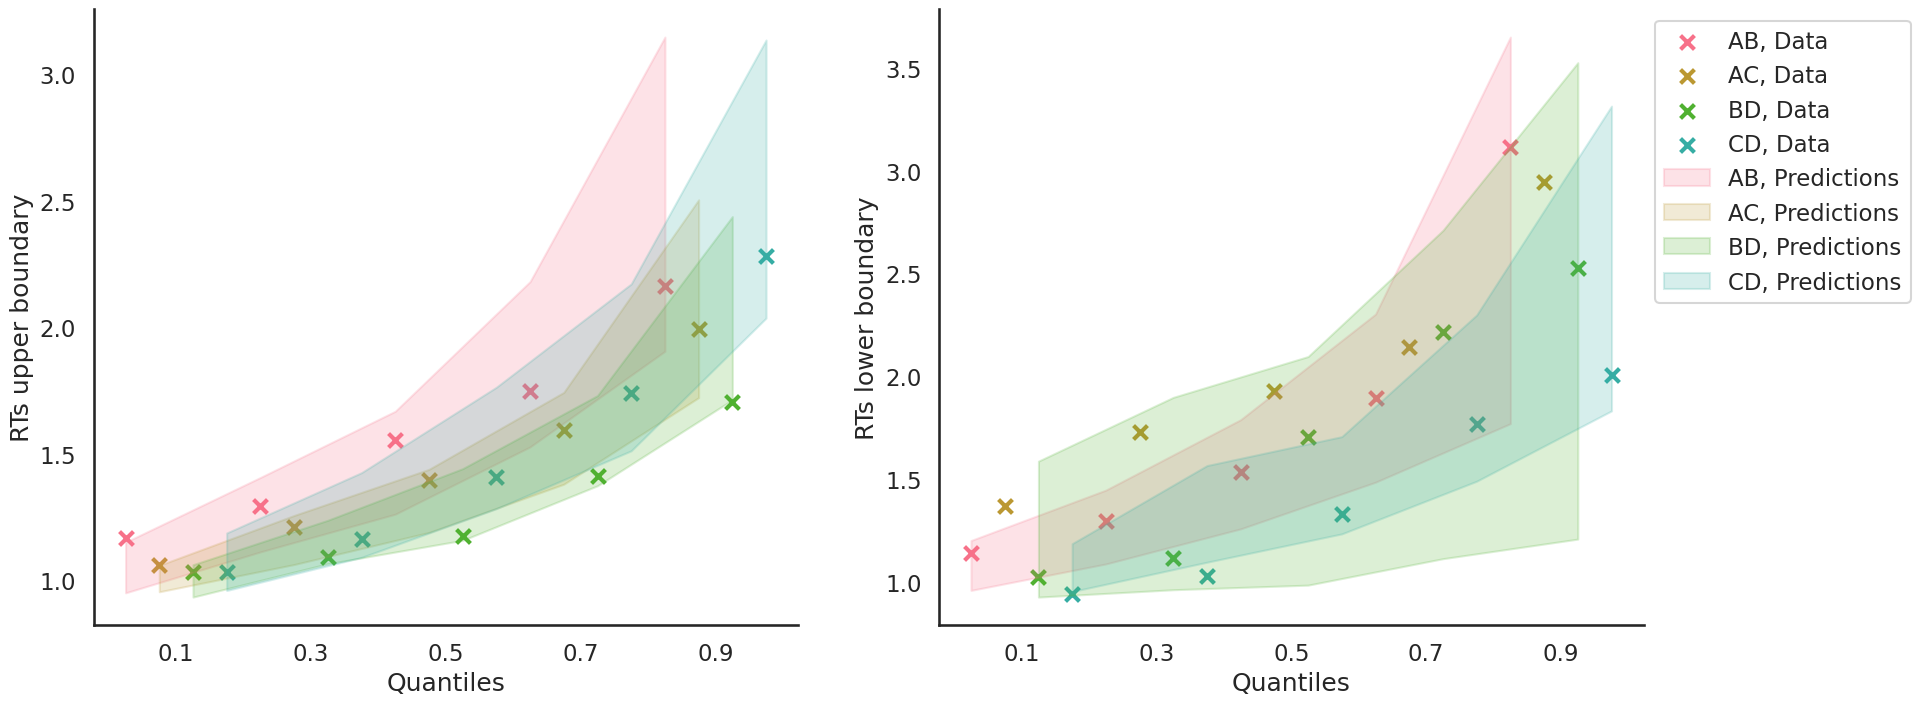

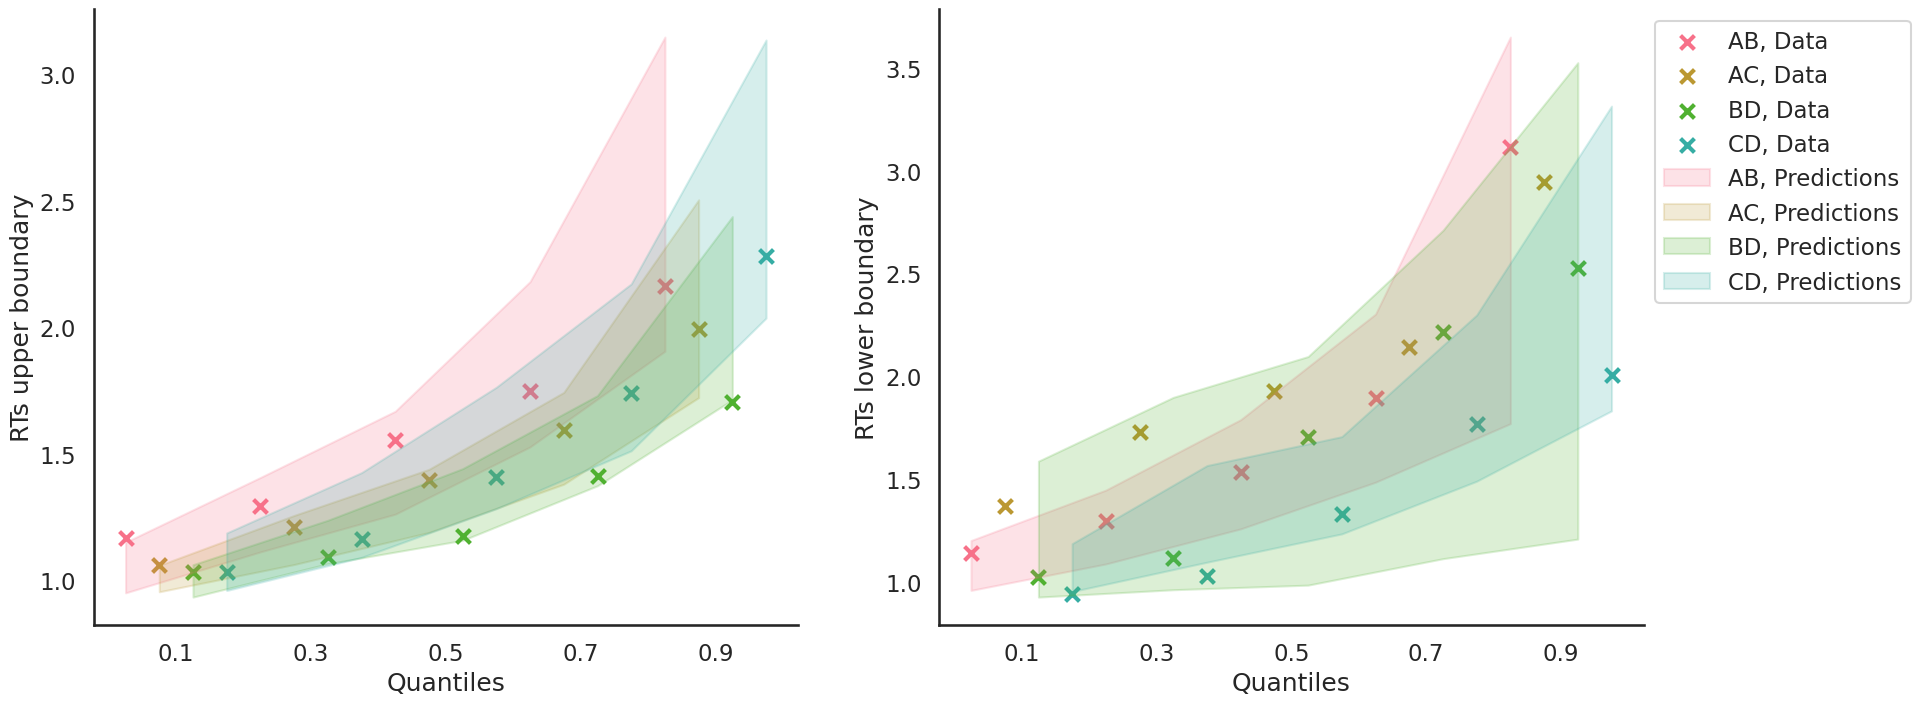

In [22]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                       grouping_var='choice_pair',
                                                       kind='shades',
                                                       quantiles=[.1, .3, .5, .7, .9])

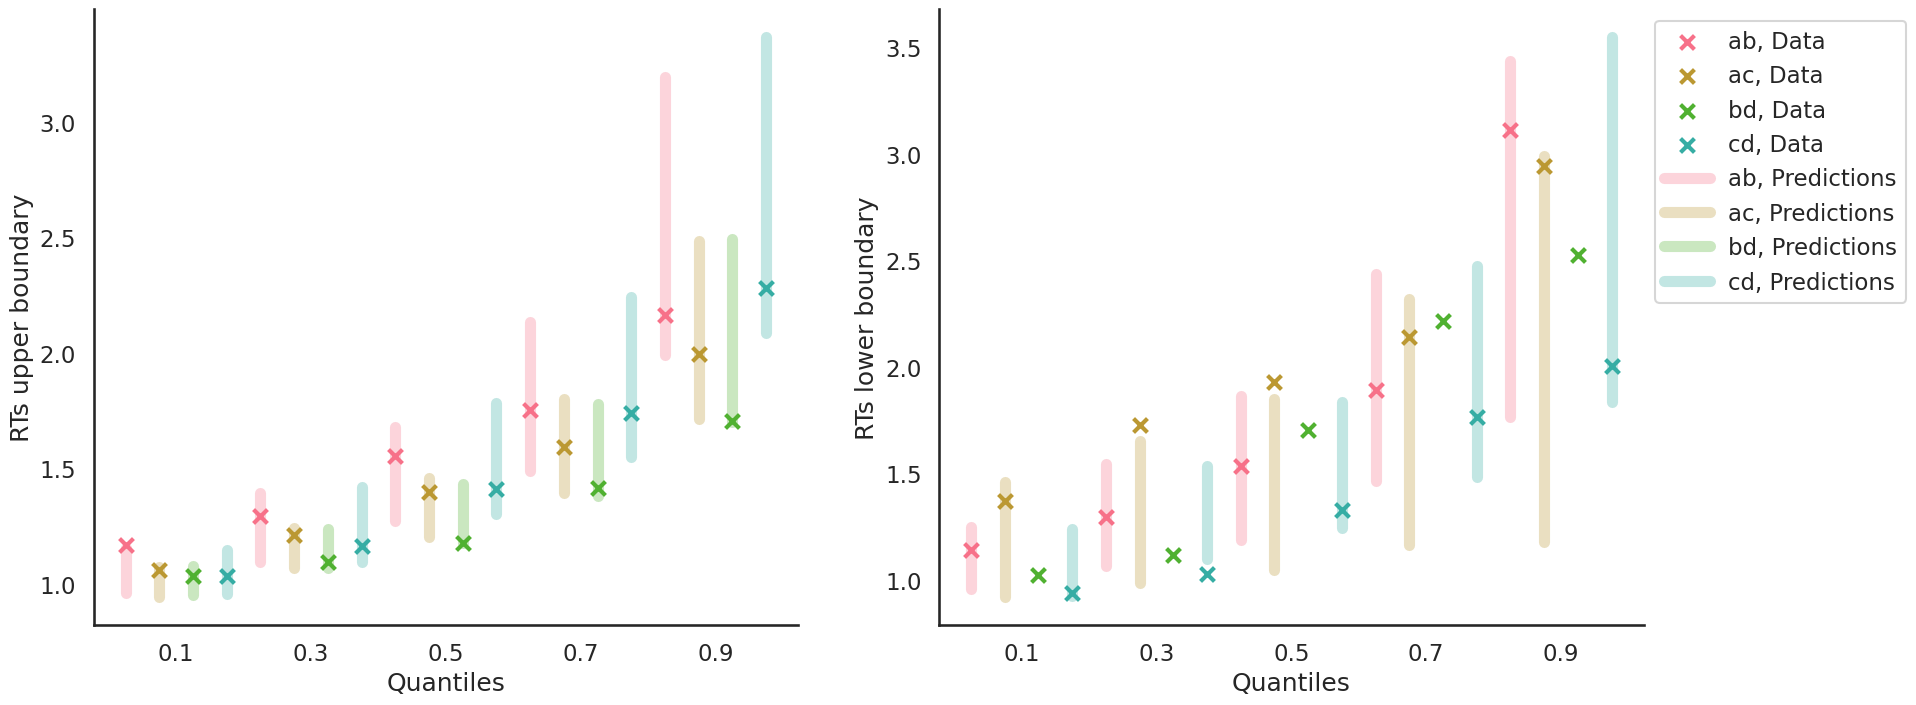

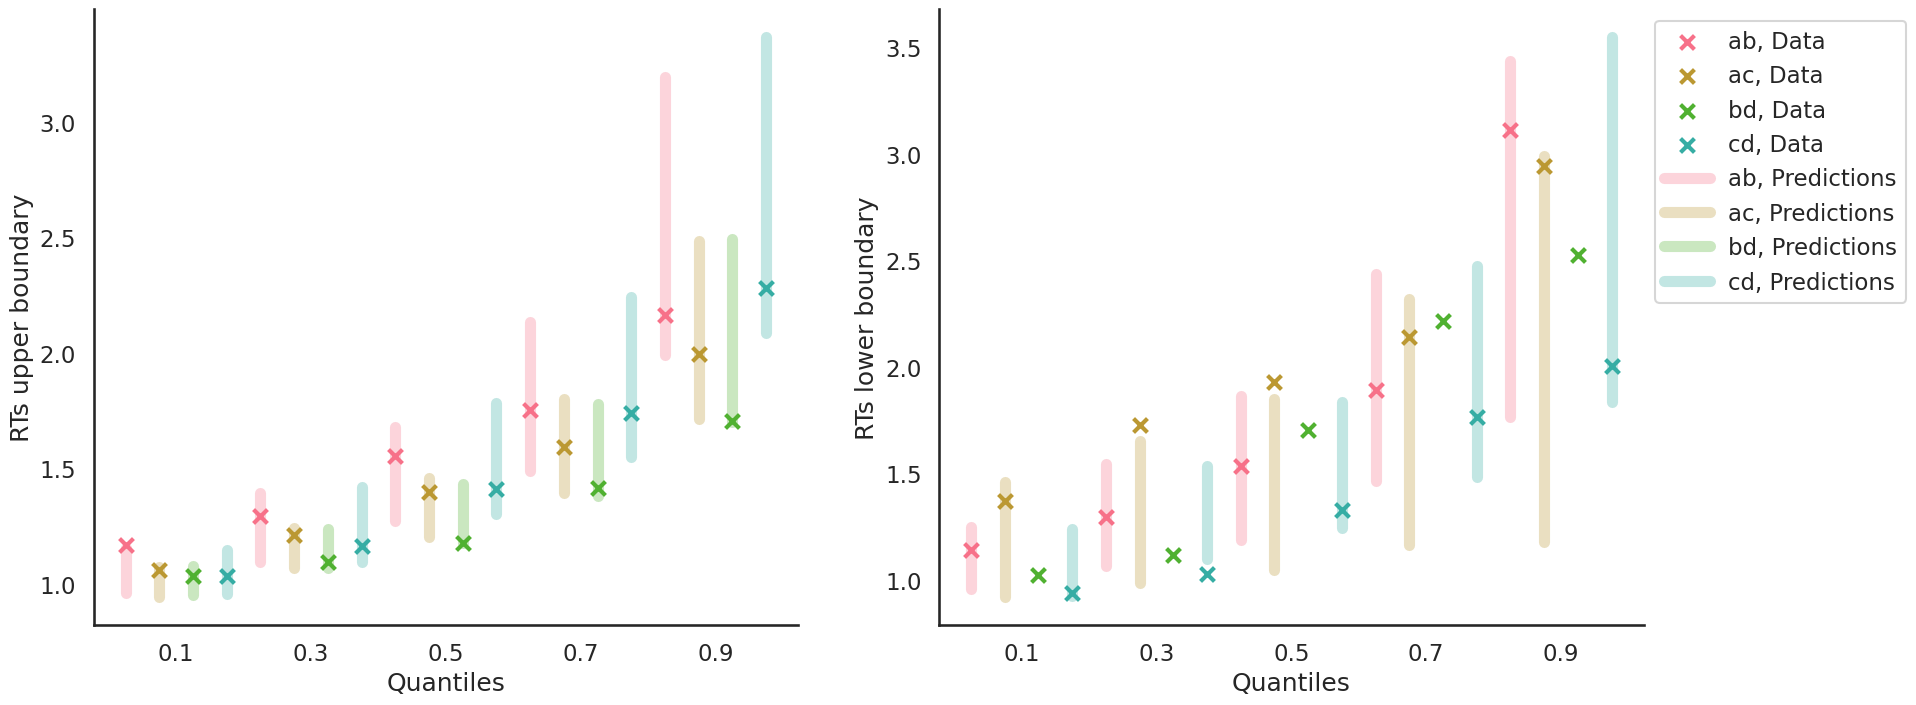

In [23]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette=sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw': 8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd'])